<b><font size=6>Project 3 Machine Learning - Regression<b>

In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import svm
from tqdm.notebook import tqdm
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
label_encoder = LabelEncoder()
scaler = StandardScaler()

<b><font size=5>s_bytes_all<b>

In [4]:
dfTest = pd.read_csv('https_test.csv')
dfTrain = pd.read_csv('https_training.csv')
dfTestBytes = dfTest.drop(columns=['c_ip', 'time', '_s_bytes_all', '_s_bytes_uniq']) 
dfTrainBytes = dfTrain.drop(columns=['c_ip', 'time', '_s_bytes_all', '_s_bytes_uniq']) 

In [8]:
X_train_bytes = dfTrainBytes.iloc[:, :-1]
X_test_bytes = dfTestBytes.iloc[:, :-1]
#print(X_train)
y_train_bytes = dfTrain['_s_bytes_all']
#y_train_bytes_labeled = pd.Categorical(y_train_bytes).codes
y_test_bytes = dfTest['_s_bytes_all']
#y_test_bytes_labeled = pd.Categorical(y_test_bytes).codes
#print(X_train)

In [9]:
scaler.fit(X_train_bytes)
X_train_bytes_scaled, X_test_bytes_scaled = scaler.transform(X_train_bytes), scaler.transform(X_test_bytes)

In [10]:
X_train_bytes_scaled, X_val_bytes_scaled, y_train_bytes, y_val_bytes = train_test_split( # X -> features, y -> labels
    X_train_bytes_scaled, # X
    y_train_bytes, # y
    #stratify = y_train_bytes, # stratify the dataset based on class labels
    train_size = 0.5/0.7, # percentage of training set
    random_state = 15 
)

In [11]:
X_train_bytes_scaled = pd.DataFrame(X_train_bytes_scaled)
X_test_bytes_scaled = pd.DataFrame(X_test_bytes_scaled)
X_val_bytes_scaled = pd.DataFrame(X_val_bytes_scaled)

correlation_matrix = X_train_bytes_scaled.corr().abs()

In [9]:
# non l'ho eseguita
def correlated_features_to_remove(correlation_matrix):
    to_delete = []
    for i, f1 in enumerate(correlation_matrix):
        for j, f2 in enumerate(correlation_matrix) :
            if ((i!=j) and (correlation_matrix.iloc[i, j]>0.8) and (f2 not in to_delete)):
                to_delete.append(f1)
                break
    return to_delete

to_delete = correlated_features_to_remove(correlation_matrix)

print(len(to_delete), 'features are removed')

44 features are removed


In [12]:
lr = LinearRegression()

lr.fit(X_train_bytes_scaled, y_train_bytes)
y_train_pred = lr.predict(X_train_bytes_scaled)
y_val_pred = lr.predict(X_val_bytes_scaled)
y_test_pred = lr.predict(X_test_bytes_scaled)

In [13]:
def output_performance(trues_train, preds_train, trues_test, preds_test, trues_val, preds_val, model_name):
    print(model_name)
    print('Training set:')
    print('Mean squared error:', mean_squared_error(trues_train, preds_train))
    print('Mean absolute error:', mean_absolute_error(trues_train, preds_train))
    print('Validation set:')
    print('Mean squared error:', mean_squared_error(trues_val, preds_val))
    print('Mean absolute error:', mean_absolute_error(trues_val, preds_val))
    print('Test set:')
    print('Mean squared error:', mean_squared_error(trues_test, preds_test))
    print('Mean absolute error:', mean_absolute_error(trues_test, preds_test))
    print()

In [14]:
output_performance(y_train_bytes, y_train_pred, y_test_bytes, y_test_pred, y_val_bytes, y_val_pred, 'Linear regression')

Linear regression
Training set:
Mean squared error: 1395207801.439667
Mean absolute error: 7419.953089454635
Validation set:
Mean squared error: 1956741308.7365372
Mean absolute error: 7926.217410566657
Test set:
Mean squared error: 2756301600.1186166
Mean absolute error: 8183.274109048822



In [ ]:
def b_kb_converter(y_train_bytes, y_train_pred, y_test_bytes, y_test_pred):
    kb = bytes / 1024
    return kb

In [11]:
X_test_bytes_scaled.shape

(114580, 118)

In [12]:
y_test_bytes.shape

(114580,)

In [13]:
y_test_pred.shape

(114580,)

In [15]:
mse = mean_squared_error(y_test_bytes, y_test_pred)
r2 = r2_score(y_test_bytes, y_test_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot dei risultati
# plt.scatter(X_test_bytes_scaled, y_test_bytes, color='black')
# plt.plot(X_test_bytes_scaled, y_test_pred, color='blue', linewidth=3)
# plt.xlabel('Features')
# plt.ylabel('s_bytes_all')
# plt.title('Regression Results')
# plt.show()

Mean Squared Error: 2756301600.1186166
R-squared: 0.9999681263456192


In [16]:
%%time

lr = LinearRegression()
param_grid = {'fit_intercept': [True, False], 'copy_X': [True, False]} # , 'normalize': [True, False]

clf = GridSearchCV(lr, param_grid, scoring='neg_mean_absolute_error', cv=5)
clf.fit(X_train_bytes_scaled, y_train_bytes)

CPU times: user 1min 24s, sys: 1min 53s, total: 3min 18s
Wall time: 28.3 s


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]},
             scoring='neg_mean_absolute_error')

In [17]:
clf.cv_results_

{'mean_fit_time': array([1.21519899, 1.28506894, 1.27895389, 1.23024669]),
 'std_fit_time': array([0.15644521, 0.16582136, 0.15213994, 0.09282678]),
 'mean_score_time': array([0.09061527, 0.09364424, 0.0628047 , 0.0833756 ]),
 'std_score_time': array([0.00878147, 0.00446969, 0.03320459, 0.03079959]),
 'param_copy_X': masked_array(data=[True, True, False, False],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_fit_intercept': masked_array(data=[True, False, True, False],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'copy_X': True, 'fit_intercept': True},
  {'copy_X': True, 'fit_intercept': False},
  {'copy_X': False, 'fit_intercept': True},
  {'copy_X': False, 'fit_intercept': False}],
 'split0_test_score': array([-1.23769868e+13, -1.12226353e+13, -1.23769868e+13, -1.12226353e+13]),
 'split1_test_score': array([  -7947.41090815, -359532.55882214,   -7947.4109

In [18]:
print("Best Parameters:", clf.best_params_)
print("Best Estimator:", clf.best_estimator_)

Best Parameters: {'copy_X': True, 'fit_intercept': False}
Best Estimator: LinearRegression(fit_intercept=False)


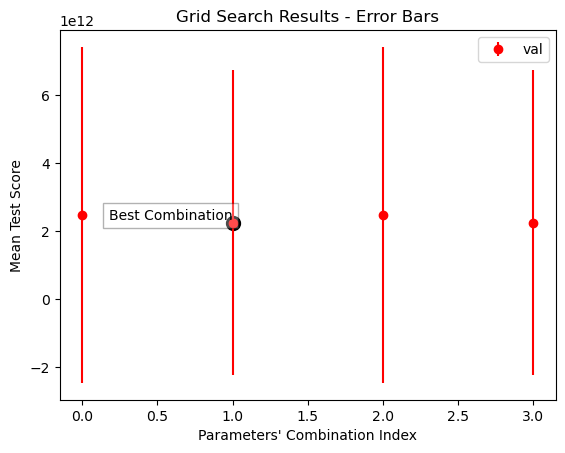

In [19]:
results = clf.cv_results_
#print(results)

param_values = [params for params in results['params']]
mean_test_scores = -results['mean_test_score']
std_test_scores = -results['std_test_score']

idx_best = np.argmin(-results["mean_test_score"])
mse_min = results["mean_test_score"][idx_best]
best_combination = results['params'][idx_best]

param_values = np.array(param_values)
mean_test_scores = np.array(mean_test_scores)
std_test_scores = np.array(std_test_scores)

#Plotting
plt.errorbar(range(len(param_values)), mean_test_scores, yerr=std_test_scores, marker='o', label='val', linestyle=' ', color='Red')
plt.xlabel('Parameters\' Combination Index')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results - Error Bars')

plt.scatter(idx_best, -mse_min, marker='o', color='black',s=100)
plt.text(idx_best, -mse_min, "Best Combination", color='black', ha='right', va='bottom', fontsize=10, bbox=dict(facecolor='white', alpha=0.3))
plt.legend()

plt.show()



In [20]:
print(results['mean_test_score'])

[-2.47539736e+12 -2.24452734e+12 -2.47539736e+12 -2.24452734e+12]


In [21]:
print(idx_best)

1


In [22]:
print(results['mean_test_score'][idx_best])

-2244527342077.1147


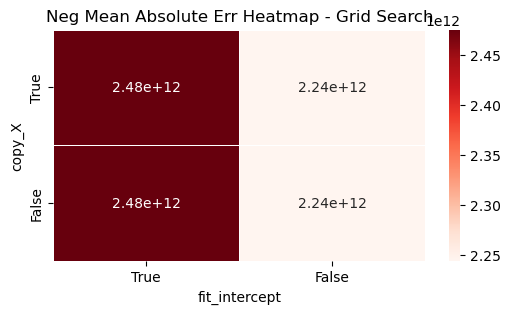

In [28]:
accuracy_map = pd.DataFrame(columns = param_grid['copy_X'], index = param_grid['fit_intercept'])
for i, param in enumerate(results["params"]):
    accuracy_map.loc[param["copy_X"], param['fit_intercept']] = -results['mean_test_score'][i]

accuracy_map = accuracy_map.astype(float)

plt.figure(figsize=(6, 3))
sns.heatmap(accuracy_map, 
            annot=True, 
            cmap='Reds', 
            fmt='.2e', 
            linewidths=.5, 
            vmin = 2.24452734e+12, 
            vmax = 2.47539736e+12)
plt.title('Neg Mean Absolute Err Heatmap - Grid Search')
plt.xlabel('fit_intercept')
plt.ylabel('copy_X')
plt.show()

In [29]:
best_combination = best_combination
best_combination

{'copy_X': True, 'fit_intercept': False}

In [33]:
%%time

lr_final = LinearRegression(
    copy_X = best_combination['copy_X'],
    fit_intercept = best_combination['fit_intercept']
)

lr_final.fit(X_train_bytes_scaled, y_train_bytes)

pred_train = lr_final.predict(X_train_bytes_scaled)
pred_val = lr_final.predict(X_val_bytes_scaled)
predictions = lr_final.predict(X_test_bytes_scaled)

CPU times: user 5.18 s, sys: 5.57 s, total: 10.7 s
Wall time: 1.55 s


In [31]:
X_test_bytes_scaled.shape

(114580, 118)

In [28]:
predictions.shape

(114580,)

In [29]:
y_test_bytes.shape

(114580,)

In [35]:
# Calcola il Mean Squared Error e Mean Absolute Error
mse_train = mean_squared_error(y_train_bytes, pred_train)
print(f"Mean Squared Error for validation set: {mse_train}")
mae_train = mean_absolute_error(y_train_bytes, pred_train)
print(f"Mean Absolute Error for validation set: {mae_train}")
mse_val = mean_squared_error(y_val_bytes, pred_val)
print(f"Mean Squared Error for validation set: {mse_val}")
mae_val = mean_absolute_error(y_val_bytes, pred_val)
print(f"Mean Absolute Error for validation set: {mae_val}")
mse_test = mean_squared_error(y_test_bytes, predictions)
print(f"Mean Squared Error for test set: {mse_test}")
mae_test = mean_absolute_error(y_test_bytes, predictions)
print(f"Mean Absolute Error for test set: {mae_test}")
# Calcola il coefficiente di determinazione R-squared
r2 = r2_score(y_test_bytes, predictions)
print(f"R-squared: {r2}")

Mean Squared Error for validation set: 130665213217.16661
Mean Absolute Error for validation set: 359689.055067414
Mean Squared Error for validation set: 131599070588.5086
Mean Absolute Error for validation set: 360011.760622056
Mean Squared Error for test set: 133259202625.44981
Mean Absolute Error for test set: 360498.0593296798
R-squared: 0.9984590010877725


<b><font size=5>s_rtt_avg<b>

In [5]:
columns_to_remove_train = dfTrain.filter(like='rtt', axis=1).columns

dfTrainRtt = dfTrain.copy()
# Rimuovi le colonne identificate
dfTrainRtt = dfTrainRtt.drop(columns=columns_to_remove_train)

X_train_rtt_2 = dfTrainRtt.iloc[:, : -3] 
X_train_rtt_2['_s_rtt_avg'] = dfTrain['_s_rtt_avg']

mask_train = X_train_rtt_2.loc[:, "_s_rtt_avg"]!=0
X_train_rtt_2 = X_train_rtt_2[mask_train]

X_train_rtt_2

,_c_ack_cnt,_c_ack_cnt_p,_c_appdataB,_c_appdataT,_c_bytes_all,_c_bytes_retx,_c_bytes_uniq,_c_cwin_ini,_c_cwin_max,_c_cwin_min,...,_s_syn_retx,_s_tm_opt,_s_ttl_max,_s_ttl_min,_s_win_0,_s_win_max,_s_win_min,_s_win_scl,_tls_session_stat,_s_rtt_avg
0,8.0,4.0,569.0,522.003,1672.0,0.0,1672.0,517.0,590.0,51.0,...,0.0,1.0,59.0,59.0,0.0,31232.0,27680.0,9.0,1.0,52.354922
1,10.0,7.0,275.0,39.504,636.0,0.0,636.0,181.0,362.0,1.0,...,0.0,1.0,59.0,59.0,0.0,29480.0,27680.0,0.0,0.0,0.959986
2,7.0,3.0,569.0,110.003,3325.0,0.0,3325.0,517.0,1435.0,51.0,...,0.0,1.0,59.0,59.0,0.0,34304.0,27680.0,9.0,1.0,37.272424
3,8.0,3.0,453.0,8.813,958.0,0.0,958.0,401.0,557.0,1.0,...,0.0,0.0,59.0,59.0,0.0,30208.0,27920.0,9.0,0.0,0.309323
4,6.0,2.0,0.0,0.000,452.0,0.0,452.0,401.0,401.0,1.0,...,0.0,0.0,59.0,59.0,0.0,29184.0,27920.0,9.0,0.0,0.434978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147858,8.0,3.0,453.0,10.011,907.0,0.0,907.0,401.0,506.0,51.0,...,0.0,0.0,59.0,59.0,0.0,30208.0,27920.0,9.0,0.0,1.289468
147859,12.0,4.0,446.0,16.000,2068.0,0.0,2068.0,394.0,838.0,51.0,...,0.0,0.0,59.0,59.0,0.0,33792.0,27920.0,9.0,0.0,3.517330
147860,12.0,6.0,306.0,53.987,430.0,0.0,430.0,212.0,212.0,38.0,...,0.0,0.0,59.0,59.0,0.0,29184.0,27920.0,9.0,0.0,2.495964
147861,13.0,6.0,306.0,54.000,886.0,0.0,886.0,212.0,543.0,38.0,...,0.0,0.0,59.0,59.0,0.0,30208.0,27920.0,9.0,0.0,2.051685


In [6]:
columns_to_remove_test = dfTest.filter(like='rtt', axis=1).columns

dfTestRtt = dfTest.copy()

dfTestRtt = dfTestRtt.drop(columns=columns_to_remove_test)

X_test_rtt_2 = dfTestRtt.iloc[:, : -3] 
X_test_rtt_2['_s_rtt_avg'] = dfTest['_s_rtt_avg']

mask_test = X_test_rtt_2.loc[:, "_s_rtt_avg"]!=0
X_test_rtt_2 = X_test_rtt_2[mask_test]

X_test_rtt_2

,_c_ack_cnt,_c_ack_cnt_p,_c_appdataB,_c_appdataT,_c_bytes_all,_c_bytes_retx,_c_bytes_uniq,_c_cwin_ini,_c_cwin_max,_c_cwin_min,...,_s_syn_retx,_s_tm_opt,_s_ttl_max,_s_ttl_min,_s_win_0,_s_win_max,_s_win_min,_s_win_scl,_tls_session_stat,_s_rtt_avg
0,24.0,5.0,309.0,11.673,725.0,13.0,712.0,215.0,459.0,1.0,...,0.0,0.0,59.0,59.0,0.0,30208.0,27920.0,9.0,0.0,14.347855
1,10.0,6.0,409.0,47.964,671.0,0.0,671.0,282.0,282.0,126.0,...,0.0,1.0,59.0,59.0,0.0,30208.0,27680.0,9.0,0.0,2.426822
2,10.0,6.0,410.0,36.464,729.0,0.0,729.0,283.0,320.0,1.0,...,0.0,1.0,59.0,59.0,0.0,30208.0,27680.0,9.0,0.0,9.733290
3,12.0,7.0,341.0,14.198,540.0,0.0,540.0,247.0,262.0,31.0,...,0.0,1.0,59.0,59.0,0.0,30208.0,27680.0,9.0,1.0,14.257525
4,25.0,6.0,309.0,20.617,725.0,13.0,712.0,215.0,459.0,38.0,...,0.0,0.0,59.0,59.0,0.0,30208.0,27920.0,9.0,0.0,1.426980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114575,27.0,7.0,611.0,16.013,2965.0,13.0,2952.0,517.0,2397.0,38.0,...,0.0,0.0,59.0,59.0,0.0,34816.0,27920.0,9.0,1.0,7.010757
114576,13.0,2.0,569.0,10.008,1425.0,6.0,1419.0,517.0,902.0,51.0,...,0.0,0.0,59.0,59.0,0.0,30720.0,27920.0,9.0,1.0,51.129722
114577,7.0,3.0,611.0,24.000,997.0,0.0,997.0,517.0,517.0,93.0,...,0.0,1.0,59.0,59.0,0.0,30208.0,27680.0,9.0,1.0,3.142937
114578,7.0,3.0,0.0,0.000,610.0,0.0,610.0,517.0,517.0,93.0,...,0.0,0.0,59.0,59.0,0.0,29184.0,27920.0,9.0,1.0,68.538049


In [7]:
X_train_rtt = X_train_rtt_2.drop(columns= "_s_rtt_avg").to_numpy()
y_train_rtt = X_train_rtt_2['_s_rtt_avg'].to_numpy()

X_test_rtt = X_test_rtt_2.drop(columns= "_s_rtt_avg").to_numpy()
y_test_rtt = X_test_rtt_2['_s_rtt_avg'].to_numpy()

In [8]:
X_train_rtt, X_val_rtt, y_train_rtt, y_val_rtt = train_test_split( # X -> features, y -> labels
    X_train_rtt, # X
    y_train_rtt, # y
    #stratify = df_training['numerical_label'], # no need of stratification
    train_size = 0.7, # percentage of training set
    random_state = 15 
)

In [10]:
scaler = StandardScaler()
scaler.fit(X_train_rtt)

X_train_rtt_scaled = pd.DataFrame(scaler.transform(X_train_rtt))
X_val_rtt_scaled = pd.DataFrame(scaler.transform(X_val_rtt))
X_test_rtt_scaled = pd.DataFrame(scaler.transform(X_test_rtt))

#correlation_matrix = X_s.corr().abs()

In [21]:
%%time

lr = LinearRegression()
lr.fit(X_train_rtt_scaled, y_train_rtt)

predictions_train = lr.predict(X_train_rtt_scaled)
predictions_val = lr.predict(X_val_rtt_scaled)
predictions_test = lr.predict(X_test_rtt_scaled)

CPU times: user 4.62 s, sys: 5.55 s, total: 10.2 s
Wall time: 1.44 s


In [22]:
### --- mean_squared_error --- ###
MSE_lr_train = mean_squared_error(predictions_train, y_train_rtt)
MSE_lr_val = mean_squared_error(predictions_val, y_val_rtt)
MSE_lr_test = mean_squared_error(predictions_test, y_test_rtt)

### --- mean_absolute_error --- ###
MAE_lr_train = mean_absolute_error(predictions_train, y_train_rtt)
MAE_lr_val = mean_absolute_error(predictions_val, y_val_rtt)
MAE_lr_test = mean_absolute_error(predictions_test, y_test_rtt)


### --- print the results --- ###
print("LINEAR REGRESSION EVALUATION:")
print("\tTRAIN SET")
#print("\t\tMEAN SQUARED ERROR = %.2f s" %(MSE_lr_train/1000))
print("\t\tMEAN ABSOLUTE ERROR = %.2f s" %(MAE_lr_train/1000))
print("\tVAL SET")
#print("\t\tMEAN SQUARED ERROR = %.2f s" %(MSE_lr_val/1000))
print("\t\tMEAN ABSOLUTE ERROR = %.2f s" %(MAE_lr_val/1000))
print("\tTEST SET")
#print("\t\tMEAN SQUARED ERROR = %.2f s" %(MSE_lr_test/1000))
print("\t\tMEAN ABSOLUTE ERROR = %.2f s" %(MAE_lr_test/1000))

LINEAR REGRESSION EVALUATION:
	TRAIN SET
		MEAN ABSOLUTE ERROR = 0.90 s
	VAL SET
		MEAN ABSOLUTE ERROR = 0.88 s
	TEST SET
		MEAN ABSOLUTE ERROR = 1.06 s


In [13]:
%%time

lr = LinearRegression()
param_grid = {'fit_intercept': [True, False], 'copy_X': [True, False]}

clf = GridSearchCV(lr, param_grid, scoring='neg_mean_absolute_error', cv=5)
clf.fit(X_train_rtt_scaled, y_train_rtt)

CPU times: user 1min 9s, sys: 1min 39s, total: 2min 49s
Wall time: 24.4 s


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]},
             scoring='neg_mean_absolute_error')

In [14]:
print("Best Parameters:", clf.best_params_)
print("Best Estimator:", clf.best_estimator_)

Best Parameters: {'copy_X': True, 'fit_intercept': False}
Best Estimator: LinearRegression(fit_intercept=False)


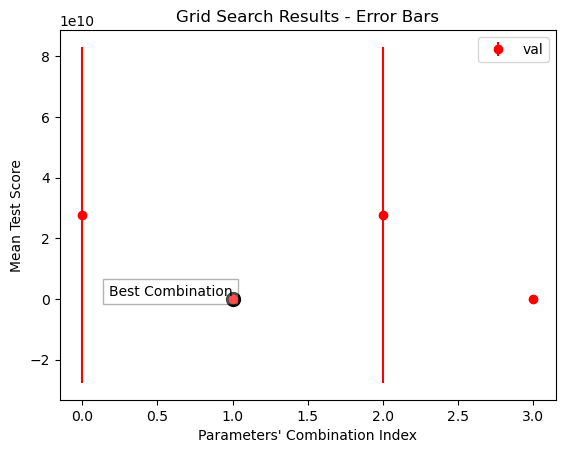

In [15]:
results = clf.cv_results_

param_values = [params for params in results['params']]
mean_test_scores = -results['mean_test_score']
std_test_scores = -results['std_test_score']

idx_best = np.argmin(-results["mean_test_score"])
mse_min = results["mean_test_score"][idx_best]
best_combination = results['params'][idx_best]

param_values = np.array(param_values)
mean_test_scores = np.array(mean_test_scores)
std_test_scores = np.array(std_test_scores)

#Plotting
plt.errorbar(range(len(param_values)), mean_test_scores, yerr=std_test_scores, marker='o', label='val', linestyle=' ', color='Red')
plt.xlabel('Parameters\' Combination Index')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results - Error Bars')

plt.scatter(idx_best, -mse_min, marker='o', color='black',s=100)
plt.text(idx_best, -mse_min, "Best Combination", color='black', ha='right', va='bottom', fontsize=10, bbox=dict(facecolor='white', alpha=0.3))
plt.legend()

plt.show()

In [16]:
print(results['mean_test_score'])

[-2.76879836e+10 -1.36280494e+03 -2.76879836e+10 -1.36280494e+03]


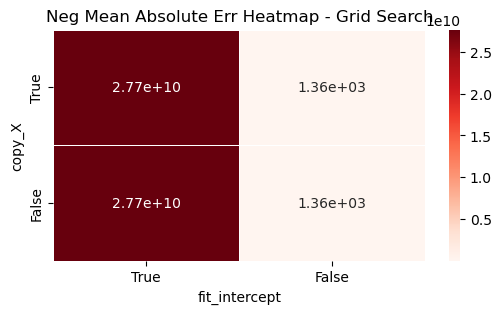

In [18]:
accuracy_map = pd.DataFrame(columns = param_grid['copy_X'], index = param_grid['fit_intercept'])
for i, param in enumerate(results["params"]):
    accuracy_map.loc[param["copy_X"], param['fit_intercept']] = -results['mean_test_score'][i]

accuracy_map = accuracy_map.astype(float)

plt.figure(figsize=(6, 3))
sns.heatmap(accuracy_map, 
            annot=True, 
            cmap='Reds', 
            fmt='.2e', 
            linewidths=.5, 
            vmin = 1.36280494e+03, 
            vmax = 2.76879836e+10)
plt.title('Neg Mean Absolute Err Heatmap - Grid Search')
plt.xlabel('fit_intercept')
plt.ylabel('copy_X')
plt.show()

In [23]:
%%time

lr_final = LinearRegression(
    copy_X = best_combination['copy_X'],
    fit_intercept = best_combination['fit_intercept']
)

lr_final.fit(X_train_rtt_scaled, y_train_rtt)

predictions_train = lr_final.predict(X_train_rtt_scaled)
predictions_val = lr_final.predict(X_val_rtt_scaled)
predictions = lr_final.predict(X_test_rtt_scaled)

CPU times: user 4.62 s, sys: 5.95 s, total: 10.6 s
Wall time: 1.47 s


In [24]:
### --- mean_squared_error --- ###
MSE_lr_train = mean_squared_error(predictions_train, y_train_rtt)
MSE_lr_val = mean_squared_error(predictions_val, y_val_rtt)
MSE_lr_test = mean_squared_error(predictions_test, y_test_rtt)

### --- mean_absolute_error --- ###
MAE_lr_train = mean_absolute_error(predictions_train, y_train_rtt)
MAE_lr_val = mean_absolute_error(predictions_val, y_val_rtt)
MAE_lr_test = mean_absolute_error(predictions_test, y_test_rtt)


### --- print the results --- ###
print("LINEAR REGRESSION EVALUATION:")
print("\tTRAIN SET")
#print("\t\tMEAN SQUARED ERROR = %.2f s" %(MSE_lassoRegression_train/1000))
print("\t\tMEAN ABSOLUTE ERROR = %.2f s" %(MAE_lr_train/1000))
print("\tVAL SET")
#print("\t\tMEAN SQUARED ERROR = %.2f s" %(MSE_lassoRegression_val/1000))
print("\t\tMEAN ABSOLUTE ERROR = %.2f s" %(MAE_lr_val/1000))
print("\tTEST SET")
#print("\t\tMEAN SQUARED ERROR = %.2f s" %(MSE_lassoRegression_test/1000))
print("\t\tMEAN ABSOLUTE ERROR = %.2f s" %(MAE_lr_test/1000))

LINEAR REGRESSION EVALUATION:
	TRAIN SET
		MEAN ABSOLUTE ERROR = 0.94 s
	VAL SET
		MEAN ABSOLUTE ERROR = 0.92 s
	TEST SET
		MEAN ABSOLUTE ERROR = 1.06 s
